In [121]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
df = pd.read_csv("df_times_cleaned.csv")

clean_df = df.drop(columns=['CAPACITY', 'END_HOURS_CONC_POUR_MON_SAT', 'END_HOURS_NEAR_HOME_FRI_SAT','END_HOURS_NEAR_HOME_SUN_THUR', 
                            'END_HOURS_NOT_NEAR_HOME', 'OMV_FRI_END_TIME','OMV_FRI_START_TIME', 'OMV_MON_END_TIME', 'OMV_MON_START_TIME',
                            'OMV_SAT_END_TIME', 'OMV_SAT_START_TIME', 'OMV_SUN_END_TIME','OMV_SUN_START_TIME', 'OMV_THU_END_TIME', 
                            'OMV_THU_START_TIME','OMV_TUE_END_TIME', 'DECIBEL_LEVEL','OMV_TUE_START_TIME','OMV_WED_END_TIME','OMV_WED_START_TIME',
                            'SQUARE_FOOTAGE','START_HOURS_CONC_POUR_MON_SAT','START_HOURS_NEAR_HOME_FRI_SAT','START_HOURS_NEAR_HOME_SUN_THUR',
                            'START_HOURS_NOT_NEAR_HOME', 'STATUS', 'EXPIRATION_DATE', 'EVENT_MONTH',
                             'in_year', 'in_mon', 'issue_mon', 'issue_year', 'ISSUED_BY', 'START_DATE'])#, 'STREET_ADDRESS']) # data leakage
#clean_df['EXPIRATION_DATE'].value_counts()
# 1. Define your target and features
#X = df.drop(columns=['time_diff'])  # features
#y = df['time_diff']  # target
top_10_streets = clean_df['STREET_ADDRESS'].value_counts().head(10).index

clean_df['Popular_Street_Address'] = clean_df['STREET_ADDRESS'].isin(top_10_streets)
clean_df = clean_df.drop(columns=['STREET_ADDRESS'])
clean_df['REST_51_PERCENT_FOOD_SALES'] = clean_df['REST_51_PERCENT_FOOD_SALES'].fillna('No')
clean_df['MULTIPLE_START_DATES'] = clean_df['MULTIPLE_START_DATES'].fillna('False')
clean_df.describe()

,EVENT_YEAR,ZIPCODE,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,time_diff
count,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.00000
mean,2017.390005,78704.685373,30.268764,-97.742098,8.165034,19.55838
std,4.273506,13.243716,0.028834,0.015964,2.087665,55.84685
min,2009.000000,78613.000000,30.133489,-97.891292,1.000000,0.00000
25%,2014.000000,78701.000000,30.261654,-97.747996,9.000000,0.00000
50%,2017.000000,78701.000000,30.266050,-97.741806,9.000000,0.00000
75%,2021.000000,78702.000000,30.268718,-97.738584,9.000000,23.50000
max,2025.000000,78759.000000,30.497375,-97.623960,10.000000,1026.00000


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = ['EVENT_YEAR', 'LATITUDE', 'LONGITUDE']
categorical_features = ['ZIPCODE', 'COUNCIL_DISTRICT', 'MULTIPLE_START_DATES', 'SUB_TYPE', 'REST_51_PERCENT_FOOD_SALES', 'AMPLIFIED_SOUND_DISTRICT']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


clean_df.describe()

,EVENT_YEAR,ZIPCODE,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,time_diff
count,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.00000
mean,2017.390005,78704.685373,30.268764,-97.742098,8.165034,19.55838
std,4.273506,13.243716,0.028834,0.015964,2.087665,55.84685
min,2009.000000,78613.000000,30.133489,-97.891292,1.000000,0.00000
25%,2014.000000,78701.000000,30.261654,-97.747996,9.000000,0.00000
50%,2017.000000,78701.000000,30.266050,-97.741806,9.000000,0.00000
75%,2021.000000,78702.000000,30.268718,-97.738584,9.000000,23.50000
max,2025.000000,78759.000000,30.497375,-97.623960,10.000000,1026.00000


In [124]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

X = clean_df.drop(columns='time_diff')
X_train, X_test, y_train, y_test = train_test_split(X, df['time_diff'], test_size=0.2, random_state=42)

# ---------- STEP 6: Fit the Model ----------
model.fit(X_train, y_train)

# ---------- STEP 7: Evaluate ----------
y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("Overall RMSE:", root_mean_squared_error(y_test, y_pred))


R² score: 0.2761149629357238
Overall RMSE: 49.897403252173845


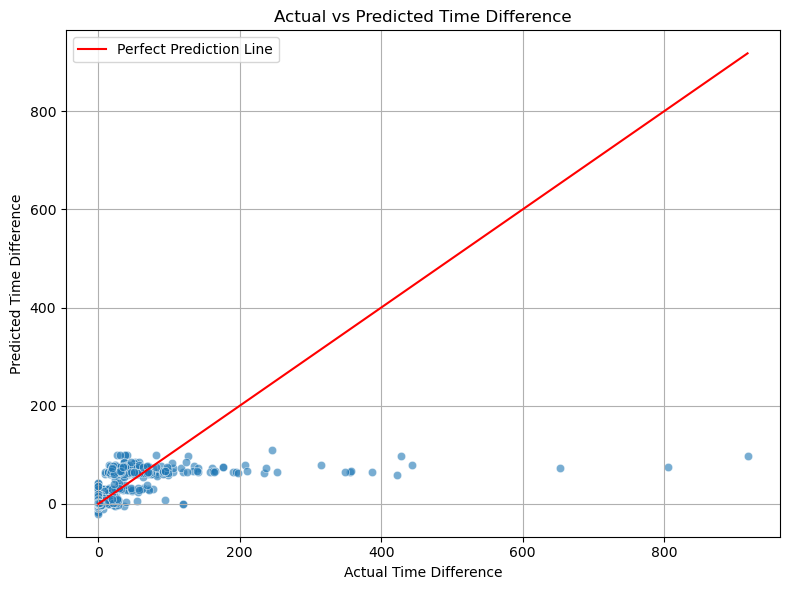

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Time Difference')
plt.ylabel('Predicted Time Difference')
plt.title('Actual vs Predicted Time Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Get components
preprocessor = model.named_steps['preprocessor']
regressor = model.named_steps['regressor']

# Get feature names
num_features = numeric_features
cat_transformer = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = cat_transformer.get_feature_names_out(categorical_features)

all_feature_names = num_features + list(cat_features)

# Get coefficients
coefs = regressor.coef_

# Combine into DataFrame
import numpy as np
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance.head(15))


                         Feature  Coefficient  Abs_Coefficient
57  SUB_TYPE_Outdoor Music Venue    48.869843        48.869843
5                  ZIPCODE_78660   -44.305853        44.305853
23                 ZIPCODE_78732   -42.816247        42.816247
40                 ZIPCODE_78758    37.462024        37.462024
21                 ZIPCODE_78730   -33.584318        33.584318
25                 ZIPCODE_78741    21.983007        21.983007
17                 ZIPCODE_78726   -21.772450        21.772450
3                  ZIPCODE_78613   -20.860057        20.860057
12                 ZIPCODE_78717   -17.448373        17.448373
20                 ZIPCODE_78729   -16.663994        16.663994
14                 ZIPCODE_78722    15.837553        15.837553
7                  ZIPCODE_78702    14.726490        14.726490
31                 ZIPCODE_78748    14.353618        14.353618
33                 ZIPCODE_78750   -13.485901        13.485901
4                  ZIPCODE_78617    13.429904        13

C:\Users\nneom\AppData\Local\Temp\ipykernel_5060\1711602356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')


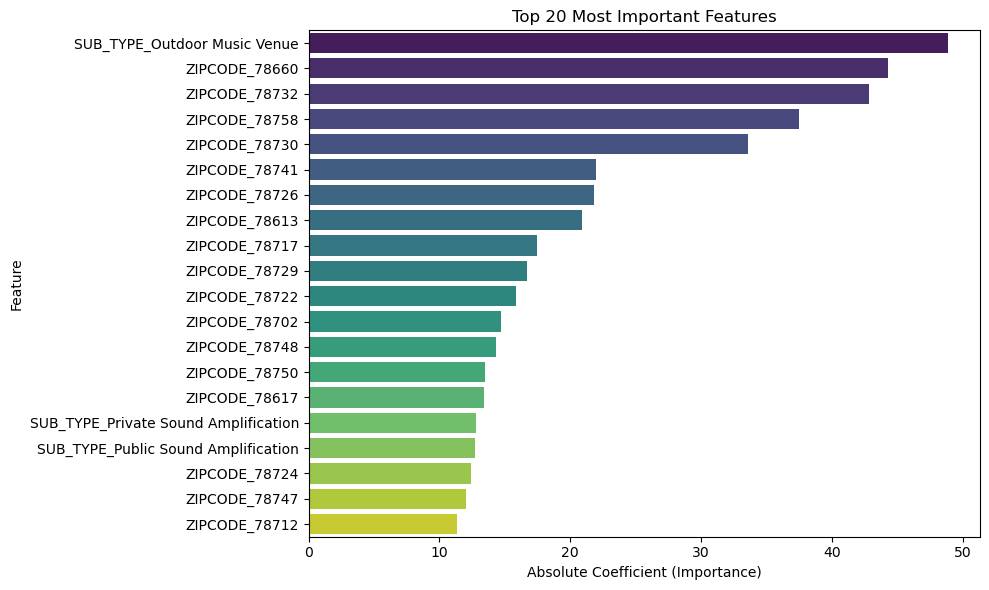

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20  # you can change this number
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


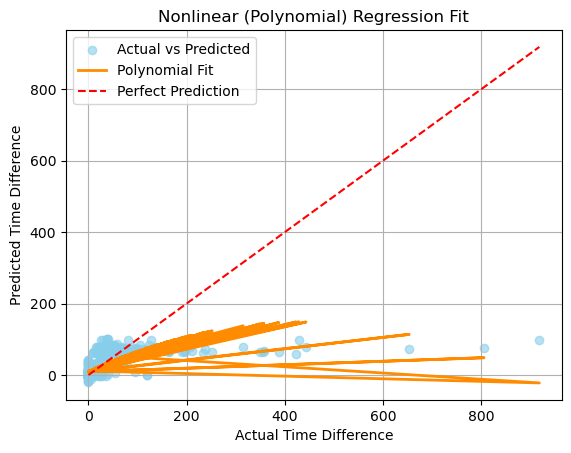

RMSE: 20.586441428599716
R²: 0.49263470117485486


In [128]:
# NON LINEAR REGRESSION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

    

# Example: Replace these with your actual data
# X = actual time difference
# y = predicted time difference
X = y_test.to_numpy().reshape(-1, 1)
y = y_pred

# Create polynomial features (try degree=2 or 3 to start)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='skyblue', alpha=0.6, label='Actual vs Predicted')
plt.plot(X, y_pred, color='darkorange', linewidth=2, label='Polynomial Fit')
plt.plot([X.min(), X.max()], [X.min(), X.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Time Difference")
plt.ylabel("Predicted Time Difference")
plt.title("Nonlinear (Polynomial) Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Model performance
print("RMSE:", root_mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))



  Feature  Coefficient  Abs_Coefficient
1       X     0.638518         0.638518
2     X^2    -0.000733         0.000733
0       1     0.000000         0.000000


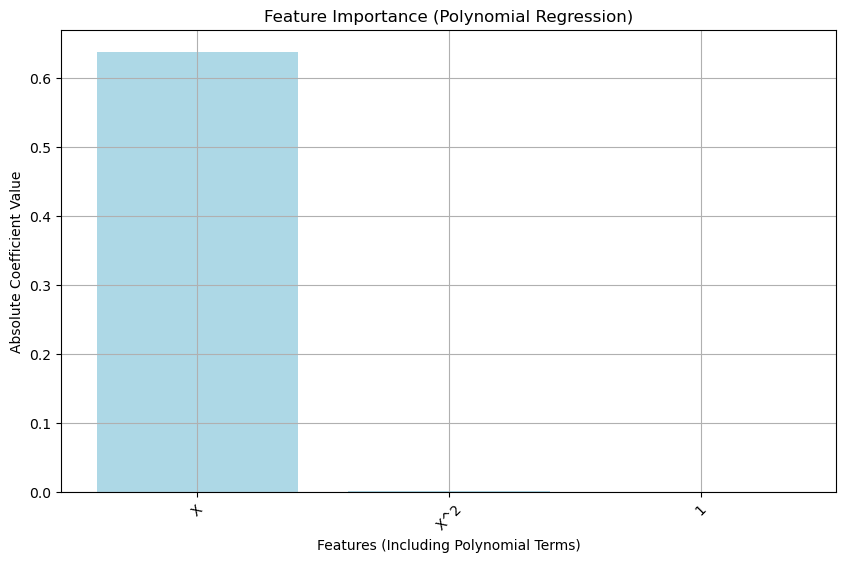

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit the polynomial regression model
poly = PolynomialFeatures(degree=2)  # Degree can be 2 or 3 or whatever degree you are using
X_poly = poly.fit_transform(X)  # Transforming the feature X to polynomial features

model = LinearRegression()
model.fit(X_poly, y)

# Extract the coefficients (importance of features)
coefficients = model.coef_

# Create a DataFrame to display the coefficients with their corresponding feature names
feature_names = poly.get_feature_names_out(input_features=['X'])
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of coefficients (important terms will have larger absolute values)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients and their importance
print(coeff_df)

# Optionally, plot the feature importance (sorted coefficients)
plt.figure(figsize=(10, 6))
plt.bar(coeff_df['Feature'], coeff_df['Abs_Coefficient'], color='lightblue')
plt.xlabel("Features (Including Polynomial Terms)")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importance (Polynomial Regression)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [132]:
clean_df

,SUB_TYPE,AMPLIFIED_SOUND_DISTRICT,EVENT_YEAR,EXISTING_ZONING,IN_DATE,ISSUE_DATE,REST_51_PERCENT_FOOD_SALES,MULTIPLE_START_DATES,ZIPCODE,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,time_diff,Popular_Street_Address
0,Outdoor Music Venue,Residential,2016,CS-1,2016-02-04,2016-03-02,No,False,78702,30.256529,-97.723233,3,27.000000,True
1,Outdoor Music Venue,Residential,2018,TOD,2018-02-28,2018-03-28,No,False,78702,30.262030,-97.722587,3,27.958333,True
2,Outdoor Music Venue,6th,2021,CBD,2021-12-29,2022-02-28,No,False,78701,30.267321,-97.738933,9,61.000000,True
3,Concrete Pouring,Unknown,2019,CBD,2019-08-20,2019-08-21,No,False,78701,30.266978,-97.741451,9,1.000000,False
4,Concrete Pouring,Unknown,2018,CBD,2018-02-16,2018-02-16,No,False,78701,30.267488,-97.746643,9,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6018,Outdoor Music Venue,Other,2015,DMU,2015-12-30,2016-03-10,No,False,78703,30.270569,-97.754058,9,71.000000,False
6019,Outdoor Music Venue,Residential,2019,GR,2019-06-07,2019-07-05,Yes,False,78704,30.240490,-97.753322,3,28.000000,False
6020,Concrete Pouring,Unknown,2009,CBD,2009-05-29,2009-06-02,No,False,78701,30.265334,-97.746641,9,4.000000,False
6021,Concrete Pouring,Unknown,2023,CBD,2023-03-24,2023-03-24,No,False,78701,30.268679,-97.745965,9,0.000000,True
